In [1]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
def get_surface_currents(filename, padding = 20):
    # Load file
    data = np.load(filename, allow_pickle=True)

    electric = data['electric']
    magnetic = data['magnetic']
    
    face_elec = electric[0]
    face_mag = magnetic[0]
    t = len(face_elec)
    Js_0 = np.zeros((t, 2, padding, padding))  # Js[t, 0] = Jy, Js[t, 1] = Jz
    Ms_0 = np.zeros((t, 2, padding, padding))  # Ms[t, 0] = My, Ms[t, 1] = Mz
    for t, (e_snap, m_snap) in enumerate(zip(face_elec, face_mag)):
        Ex, Ey, Ez = e_snap
        Hx, Hy, Hz = m_snap
        Hz = Hx[0, :, :]
        Hy = Hy[0, :, :]
        Ez = Ex[0, :, :]
        Ey = Ey[0, :, :]

        Ms_0[t, 0] = Ez        # My
        Ms_0[t, 1] = -Ey       # Mz

        Js_0[t, 0] = -Hz       # Jy
        Js_0[t, 1] = Hy        # Jz
    
    face_elec = electric[1]
    face_mag = magnetic[1]
    t = len(face_elec)
    Js_1 = np.zeros((t, 2, padding, padding))  # Js[t, 0] = Jx, Js[t, 1] = Jy
    Ms_1 = np.zeros((t, 2, padding, padding))  # Ms[t, 0] = Mx, Ms[t, 1] = My
    for t, (e_snap, m_snap) in enumerate(zip(face_elec, face_mag)):
        Ex, Ey, Ez = e_snap
        Hx, Hy, Hz = m_snap

        Hx = Hx[:, :, 0]
        Hy = Hy[:, :, 0]
        Ex = Ex[:, :, 0]
        Ey = Ey[:, :, 0]

        Ms_1[t, 0] = -Ey        # Mx
        Ms_1[t, 1] = Ex       # My

        Js_1[t, 0] = Hy       # Jx
        Js_1[t, 1] = -Hx        # Jy    

        
    face_elec = electric[2]
    face_mag = magnetic[2]
    t = len(face_elec)
    Js_2 = np.zeros((t, 2, padding, padding))   # Js[t, 0] = Jx, Js[t, 1] = Jz
    Ms_2 = np.zeros((t, 2, padding, padding))  # Ms[t, 0] = Mx, Ms[t, 1] = Mz
    for t, (e_snap, m_snap) in enumerate(zip(face_elec, face_mag)):
        Ex, Ey, Ez = e_snap
        Hx, Hy, Hz = m_snap

        Hx = Hx[:, 0, :]
        Hz = Hy[:, 0, :]
        Ex = Ex[:, 0, :]
        Ez = Ey[:, 0, :]

        Ms_2[t, 0] = Ez        # Mx
        Ms_2[t, 1] = -Ex       # Mz

        Js_2[t, 0] = -Hz       # Jx
        Js_2[t, 1] = Hx        # Jz    

    face_elec = electric[3]
    face_mag = magnetic[3]
    t = len(face_elec)
    Js_3 = np.zeros((t, 2, padding, padding))  # Js[t, 0] = Jx, Js[t, 1] = Jy
    Ms_3 = np.zeros((t, 2, padding, padding))  # Ms[t, 0] = Mx, Ms[t, 1] = My
    for t, (e_snap, m_snap) in enumerate(zip(face_elec, face_mag)):
        Ex, Ey, Ez = e_snap
        Hx, Hy, Hz = m_snap

        Hx = Hx[:, :, 0]
        Hy = Hy[:, :, 0]
        Ex = Ex[:, :, 0]
        Ey = Ey[:, :, 0]

        Ms_3[t, 0] = Ey        # Mx
        Ms_3[t, 1] = -Ex       # My

        Js_3[t, 0] = -Hy       # Jx
        Js_3[t, 1] = Hx        # Jy    

    face_elec = electric[4]
    face_mag = magnetic[4]
    t = len(face_elec)
    Js_4 = np.zeros((t, 2, padding, padding))   # Js[t, 0] = Jx, Js[t, 1] = Jz
    Ms_4 = np.zeros((t, 2, padding, padding))  # Ms[t, 0] = Mx, Ms[t, 1] = Mz
    for t, (e_snap, m_snap) in enumerate(zip(face_elec, face_mag)):
        Ex, Ey, Ez = e_snap
        Hx, Hy, Hz = m_snap

        Hx = Hx[:, 0, :]
        Hz = Hy[:, 0, :]
        Ex = Ex[:, 0, :]
        Ez = Ey[:, 0, :]

        Ms_4[t, 0] = -Ez        # Mx
        Ms_4[t, 1] = Ex       # Mz

        Js_4[t, 0] = Hz       # Jx
        Js_4[t, 1] = -Hx        # Jz 

    face_elec = electric[5]
    face_mag = magnetic[5]
    t = len(face_elec)
    Js_5 = np.zeros((t, 2, padding, padding))  # Js[t, 0] = Jy, Js[t, 1] = Jz
    Ms_5 = np.zeros((t, 2, padding, padding))  # Ms[t, 0] = My, Ms[t, 1] = Mz
    for t, (e_snap, m_snap) in enumerate(zip(face_elec, face_mag)):
        Ex, Ey, Ez = e_snap
        Hx, Hy, Hz = m_snap
        Hz = Hx[0, :, :]
        Hy = Hy[0, :, :]
        Ez = Ex[0, :, :]
        Ey = Ey[0, :, :]

        Ms_5[t, 0] = -Ez        # My
        Ms_5[t, 1] = Ey       # Mz

        Js_5[t, 0] = Hz       # Jy
        Js_5[t, 1] = -Hy        # Jz

    Js_faces = [Js_0, Js_1, Js_2, Js_3, Js_4, Js_5]
    Ms_faces = [Ms_0, Ms_1, Ms_2, Ms_3, Ms_4, Ms_5]

    return Js_faces, Ms_faces


def generate_surface_coordinates(N=20, cube_size=0.20):
    """
    Returns a NumPy array of shape (6, 3, N, N) where:
    - 6 is the number of faces
    - 3 corresponds to X, Y, Z coordinates
    - N x N is the spatial resolution of each face
    """
    L = cube_size
    lin = np.linspace(-L/2, L/2, N)
    coords = np.zeros((6, 3, N, N), dtype=np.float32)

    # Face 0: -x (Y-Z plane at x = -L/2)
    Y, Z = np.meshgrid(lin, lin, indexing='ij')
    coords[0, 0] = -L/2
    coords[0, 1] = Y
    coords[0, 2] = Z

    # Face 1: -z (X-Y plane at z = -L/2)
    Y, X = np.meshgrid(lin, lin, indexing='ij')
    coords[1, 0] = X
    coords[1, 1] = Y
    coords[1, 2] = -L/2

    # Face 2: -y (X-Z plane at y = -L/2)
    Z, X = np.meshgrid(lin, lin, indexing='ij')
    coords[2, 0] = X
    coords[2, 1] = -L/2
    coords[2, 2] = Z

    # Face 3: +z (X-Y plane at z = +L/2)
    Y, X = np.meshgrid(lin, lin, indexing='ij')
    coords[3, 0] = X
    coords[3, 1] = Y
    coords[3, 2] = +L/2

    # Face 4: +y (X-Z plane at y = +L/2)
    Z, X = np.meshgrid(lin, lin, indexing='ij')
    coords[4, 0] = X
    coords[4, 1] = +L/2
    coords[4, 2] = Z

    # Face 5: +x (Y-Z plane at x = +L/2)
    Z, Y = np.meshgrid(lin, lin, indexing='ij')
    coords[5, 0] = +L/2
    coords[5, 1] = Y
    coords[5, 2] = Z

    return coords


# Constants
c = 299792458  # m/s
mu0 = 4 * np.pi * 1e-7
eps0 = 1 / (mu0 * c ** 2)

def cartesian_to_spherical(xyz):
    x, y, z = xyz
    r = np.sqrt(x**2 + y**2 + z**2)
    theta = np.arccos(z / r)
    phi = np.arctan2(y, x)
    return r, theta, phi

def unit_vector_spherical(theta, phi):
    # returns [x, y, z] unit vectors for r, theta, phi directions
    return (
        np.array([np.sin(theta)*np.cos(phi), np.sin(theta)*np.sin(phi), np.cos(theta)]),
        np.array([np.cos(theta)*np.cos(phi), np.cos(theta)*np.sin(phi), -np.sin(theta)]),
        np.array([-np.sin(phi), np.cos(phi), 0])
    )

def surface_normals():
    return [
        np.array([-1,0,0]),   # -x
        np.array([0,0,-1]),   # -z
        np.array([0,-1,0]),   # -y
        np.array([0,0,1]),    # +z
        np.array([0,1,0]),    # +y
        np.array([1,0,0])     # +x
    ]

def face_tangential_to_cartesian(face_id, curr):
    # curr: length 2 array, as returned by Js_patch or Ms_patch
    
    if face_id == 0 or face_id == 5:   # -x, +x
        v = np.array([0, curr[0], curr[1]])
    elif face_id == 1 or face_id == 3: # -z, +z
        v = np.array([curr[0], curr[1], 0])
    elif face_id == 2 or face_id == 4: # -y, +y
        v = np.array([curr[0], 0, curr[1]])
    else:
        raise ValueError("face_id out of range (should be 0-5 inclusive)")
    return v


def calculate_far_field_time_trace(Js_faces, Ms_faces, coords,
                                   obs_r, obs_theta, obs_phi,
                                   t_array, dt, cube_size):
    
    # normals = surface_normals()
    N = coords.shape[-1]
    
    far_E_trace = np.zeros((len(t_array), 3), dtype=np.float64)

    hat_r = np.array([
        np.sin(obs_theta) * np.cos(obs_phi)- 0.25,
        np.sin(obs_theta) * np.sin(obs_phi)- 0.25,
        np.cos(obs_theta)- 0.25
    ])
    delta_S = (cube_size) ** 2

    for obs_idx, t_obs in tqdm(enumerate(t_array)):
        far_E = np.zeros(3, dtype=np.float64)
        for face_id in range(6):
            Js = Js_faces[face_id]  # (t_near, 2, N, N)
            Ms = Ms_faces[face_id]
            xyz = coords[face_id]

            for i in range(N):
                for j in range(N):
                    r0 = np.array([xyz[0, i, j], xyz[1, i, j], xyz[2, i, j]])
                    R_vec = ((obs_r * hat_r)+[0.25,0.25,0.25]) - r0
                    R = np.linalg.norm(R_vec)

                    ret = t_obs - R / c
                    if ret < t_array[0] or ret > t_array[-1]:
                        continue  # Outside available data

                    t_idx = np.searchsorted(t_array, ret)
                    if t_idx == 0 or t_idx >= len(t_array):
                        continue

                    dJs_dt = (Js[t_idx, :, i, j] - Js[t_idx - 1, :, i, j]) / dt
                    dMs_dt = (Ms[t_idx, :, i, j] - Ms[t_idx - 1, :, i, j]) / dt
                    # print(f"this is shape: {dJs_dt[0]} and {dJs_dt[1]}")

                    dJs_cart = face_tangential_to_cartesian(face_id, dJs_dt)
                    dMs_cart = face_tangential_to_cartesian(face_id, dMs_dt)

                    proj_J = dJs_cart - hat_r * np.dot(hat_r, dJs_cart)
                    proj_M = np.cross(hat_r, dMs_cart)

                    far_E += (-mu0/(4*np.pi*obs_r) * proj_J +
                               1/(4*np.pi*c*obs_r) * proj_M) * delta_S

        far_E_trace[obs_idx] = far_E

    return far_E_trace



In [2]:
Js_faces, Ms_faces= get_surface_currents('nfft_snapshots_model1.npz')
    # ---- Parameters ----
N = 20               # Number of grid points per face (surface resolution)
T = 150              # Number of time samples
cube_size = 0.20     # Side length of cube, meters
dt = 1e-9           # Time step, seconds
t_array = np.arange(0, T*dt, dt)   # t = 0, dt, 2dt, ..., (T-1)*dt

# ---- Surface coordinates ----
coords = generate_surface_coordinates(N=N, cube_size=cube_size)  # (6, 3, N, N)


In [3]:

obs_r = 1.0
obs_theta = np.pi/3
obs_phi = np.pi/4
far_E_trace = calculate_far_field_time_trace(
    Js_faces=Js_faces,
    Ms_faces=Ms_faces,
    coords=coords,
    obs_r=obs_r,
    obs_theta=obs_theta,
    obs_phi=obs_phi,
    t_array=t_array,
    dt=dt,
    cube_size=cube_size
)



0it [00:00, ?it/s]

150it [00:31,  4.82it/s]


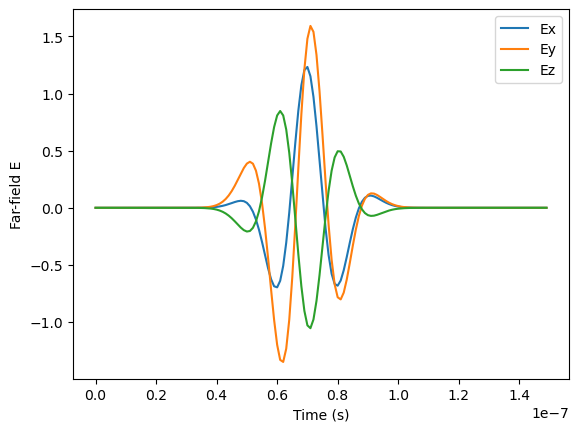

In [5]:
# To plot or analyze:
import matplotlib.pyplot as plt
plt.plot(t_array, far_E_trace[:, 0], label='Ex')
plt.plot(t_array, far_E_trace[:, 1], label='Ey')
plt.plot(t_array, far_E_trace[:, 2], label='Ez')
plt.xlabel('Time (s)')
plt.ylabel('Far-field E')
plt.legend()
plt.show()

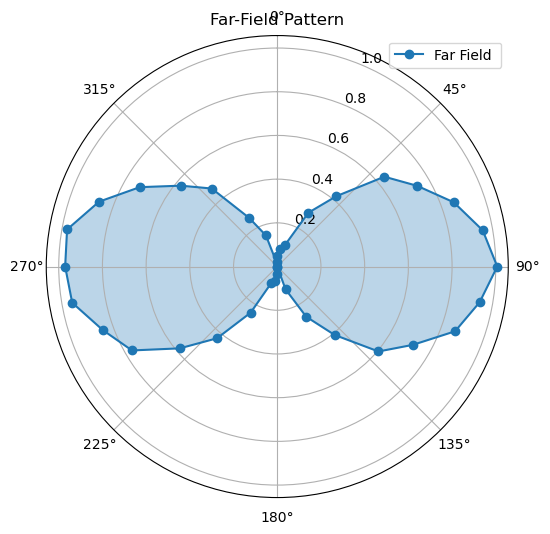

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
phi_values_deg = np.arange(0, 360, 20)  
obs_theta = 0   
obs_r = 1.0              
dt = 1e-9                

# Storage for far-field magnitudes
magnitudes = []

for phi_deg in phi_values_deg:
    phi_rad = np.deg2rad(phi_deg)
    far = calculate_far_field_time_trace(
        Js_faces=Js_faces,
        Ms_faces=Ms_faces,
        coords=coords,
        obs_r=obs_r,
        obs_theta=obs_theta,
        obs_phi=phi_rad,
        t_array=t_array,
        dt=dt,
        cube_size=cube_size
    )  

    # Compute total E-field magnitude and take peak
    E_mag = np.linalg.norm(far, axis=1)
    peak_val = np.max(np.abs(E_mag))
    magnitudes.append(peak_val)

# Convert to numpy array and normalize
magnitudes = np.array(magnitudes)
magnitudes /= np.max(magnitudes)

# Create polar plot
fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, polar=True)

# For polar plot, angles in radians
phi_values_rad = np.deg2rad(phi_values_deg)

# Make it a closed loop for polar plot
phi_values_rad = np.append(phi_values_rad, phi_values_rad[0])
magnitudes = np.append(magnitudes, magnitudes[0])

ax.set_theta_zero_location('N')  # 0° at top
ax.set_theta_direction(-1)       # clockwise
ax.plot(phi_values_rad, magnitudes, 'o-', label="Numerical Far Field")
ax.fill(phi_values_rad, magnitudes, alpha=0.3)

ax.set_title("Far-Field Pattern at θ = 90°", va='bottom')
ax.legend()
plt.show()


100it [00:19,  5.04it/s]
100it [00:16,  6.24it/s]
100it [00:15,  6.37it/s]
100it [00:15,  6.45it/s]
100it [00:15,  6.45it/s]
100it [00:25,  3.92it/s]
100it [00:15,  6.34it/s]
100it [00:15,  6.46it/s]
100it [00:16,  6.16it/s]
100it [00:15,  6.47it/s]
100it [00:15,  6.30it/s]
100it [00:22,  4.43it/s]
100it [00:35,  2.81it/s]
100it [00:35,  2.80it/s]
100it [00:35,  2.79it/s]
100it [00:35,  2.80it/s]
100it [00:34,  2.88it/s]
100it [00:35,  2.79it/s]


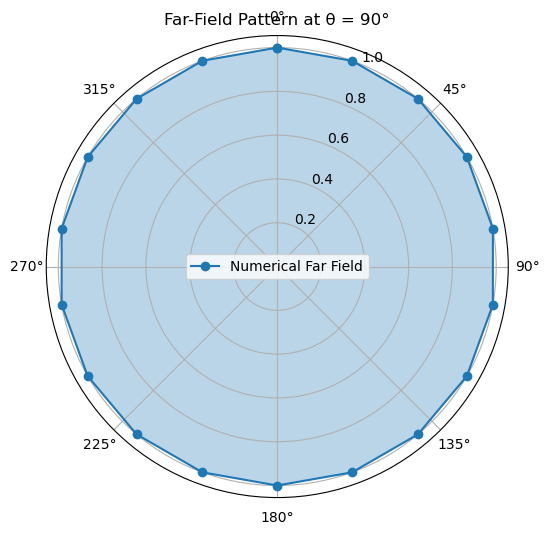

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Parameters
phi_values_deg = np.arange(0, 360, 20)  
obs_theta = np.pi/2      
obs_r = 1.0             
dt = 1e-9               

# Storage for far-field magnitudes
magnitudes = []

for phi_deg in phi_values_deg:
    phi_rad = np.deg2rad(phi_deg)
    far = calculate_far_field_time_trace(
        Js_faces=Js_faces,
        Ms_faces=Ms_faces,
        coords=coords,
        obs_r=obs_r,
        obs_theta=obs_theta,
        obs_phi=phi_rad,
        t_array=t_array,
        dt=dt,
        cube_size=cube_size
    ) 

    E_mag = np.linalg.norm(far, axis=1)
    peak_val = np.max(np.abs(E_mag))
    magnitudes.append(peak_val)

magnitudes = np.array(magnitudes)
magnitudes /= np.max(magnitudes)


fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, polar=True)

phi_values_rad = np.deg2rad(phi_values_deg)

phi_values_rad = np.append(phi_values_rad, phi_values_rad[0])
magnitudes = np.append(magnitudes, magnitudes[0])

ax.set_theta_zero_location('N')  
ax.set_theta_direction(-1)      
ax.plot(phi_values_rad, magnitudes, 'o-', label="Numerical Far Field")
ax.fill(phi_values_rad, magnitudes, alpha=0.3)

ax.set_title("Far-Field Pattern at θ = 90°", va='bottom')
ax.legend()
plt.show()
